In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
N = 100
X = np.linspace(0, 4*np.pi, N)
def f(X):
  return np.sin(X)
y = f(X)

def derivative(X, y, *, method='central'):

    if method == 'forward':
        y_FW = [
          (y[i+1] - y[i]) / (X[i+1] - X[i]) for i in range(0, N-1)
        ] + [
          (y[N-1] - y[N-2]) / (X[N-1] - X[N-2])
        ]
        return np.array(y_FW)
    elif method == 'backward':
        y_BW = [
          (y[1] - y[0]) / (X[1] - X[0])
        ] + [
          (y[i] - y[i-1]) / (X[i] - X[i-1]) for i in range(1, N)
        ]
        return np.array(y_BW)
    elif method == 'central':
        y_CE = [
          (y[1] - y[0]) / (X[1] - X[0])
        ] + [
          (y[i+1] - y[i-1]) / (X[i+1] - X[i-1]) for i in range(1, N-1)
        ] + [
          (y[N-1] - y[N-2]) / (X[N-1] - X[N-2])
        ]
        return np.array(y_CE)
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

In [36]:
def derivatives(X, y, *, method='central', dn=1):
  
  dy = np.array(y).copy()
  for i in range(dn):
    dy = derivative(X, dy, method=method)
    
  return dy

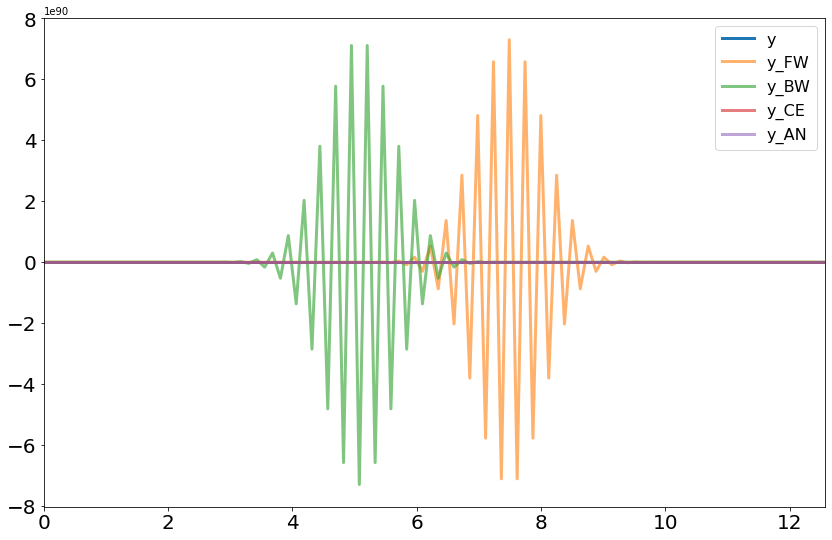

In [49]:
fig, ax = plt.subplots(figsize=(14, 9))

lw = 3
alpha = 0.6
dn = 80
ax.plot(X, f(X), label='y', color='tab:blue', lw=lw)
ax.plot(X, derivatives(X, y, method='forward', dn=dn),
        label='y_FW', color='tab:orange', lw=lw, alpha=alpha)
ax.plot(X, derivatives(X, y, method='backward', dn=dn),
        label='y_BW', color='tab:green', lw=lw, alpha=alpha)
ax.plot(X, derivatives(X, y, method='central', dn=dn),
        label='y_CE', color='tab:red', lw=lw, alpha=alpha)
ax.plot(X, np.cos(X),
        label='y_AN', color='tab:purple', lw=lw, alpha=alpha)

ax.set_xlim(min(X), max(X))
#ax.set_ylim(-1, 1)

ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(loc='best', fontsize=16)

plt.show()

HF:  
y' = y   |  y(0) = 1  
y" = -y  |  y(0) = 1, y'(0) = 0